# Check on the files exported by Equivital Qiosk

Plot and review measurements from equivital sensors as output by the Equivital Qiosk application, second installation.

In [1]:
import sys
import os
import time
import datetime as dt
import math
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import heartpy as hp

from scipy.signal import butter,filtfilt
from scipy import interpolate
from scipy.interpolate import interp1d

## Definitions for data extraction

In [2]:
%load_ext autoreload
%autoreload 1
%aimport qex

In [3]:
%reload_ext autoreload

In [23]:
# running on mac
seperator = '/'
seperator

'/'

In [3]:
pwd

'C:\\Users\\fourMs lab\\Documents\\Equivital_data_reviewing-main'

In [3]:
seperator = str('\\')
seperator

'\\'

# Scan for DATA files in Qiosk exported files
Check the usual spot that QIOSK deposits files for data files detailing recordings

In [4]:
# location of the files when exported by QIOSK
path = "C:\\Users\\Public\\Documents\\Equivital\\Equivital Manager Wizard\\"#Extracted SEM Data\\" #"../Equivital/Equivital Manager Wizard/Extracted SEM Data/"
#os.listdir(path)

In [5]:
df_datafiles = qex.qiosk_recordings(path,'Present',seperator)
df_datafiles

,Signal,DevName,ID,Date,Session,FileName,FileType,FileSize,RecStart,RecEnd,...,SubjectNames,SENSOR ID,SUBJECT ID,SUBJECT AGE,HR(BPM),HRC(%),BELT OFF,LEAD OFF,MOTION,BODY POSITION
0,DATA,VN102,3420426,230218,0,DATA-VN102-3420426-23021800.CSV,csv,70509,2023-02-18 13:25:57+00:00,2023-02-18 17:00:27+00:00,...,[VN102],3420426,VN102,NaN,0,100,0,1,Stationary,Upright
1,DATA,VN101,3420415,230218,0,DATA-VN101-3420415-23021800.CSV,csv,71160,2023-02-18 13:25:57+00:00,2023-02-18 17:00:27+00:00,...,[VN101],3420415,VN101,NaN,0,98,0,1,MovingSlowly,Upright
2,DATA,VN103,3420427,230218,0,DATA-VN103-3420427-23021800.CSV,csv,70869,2023-02-18 13:25:59+00:00,2023-02-18 17:00:29+00:00,...,[VN103],3420427,VN103,NaN,0,100,0,1,Stationary,Upright
3,DATA,VN104,3420456,230218,0,DATA-VN104-3420456-23021800.CSV,csv,70650,2023-02-18 13:26:01+00:00,2023-02-18 17:00:31+00:00,...,[VN104],3420456,VN104,NaN,0,100,0,1,Stationary,Prone
4,DATA,VN106,5022002,230218,0,DATA-VN106-5022002-23021800.CSV,csv,71093,2023-02-18 13:26:05+00:00,2023-02-18 17:00:35+00:00,...,[VN106],5022002,VN106,NaN,0,100,0,0,Stationary,Upright
5,DATA,VN105,3420755,230218,0,DATA-VN105-3420755-23021800.CSV,csv,70421,2023-02-18 13:26:05+00:00,2023-02-18 17:00:35+00:00,...,[VN105],3420755,VN105,NaN,0,98,0,1,Stationary,Upright
6,DATA,VN108,5022009,230218,0,DATA-VN108-5022009-23021800.CSV,csv,70636,2023-02-18 13:26:36+00:00,2023-02-18 17:00:51+00:00,...,[VN108],5022009,VN108,NaN,4,98,0,1,Stationary,Upright
7,DATA,VN107,5022006,230218,0,DATA-VN107-5022006-23021800.CSV,csv,70577,2023-02-18 13:26:36+00:00,2023-02-18 17:00:51+00:00,...,[VN107],5022006,VN107,NaN,0,97,0,1,Stationary,Upright
8,DATA,VN201,5022050,230218,0,DATA-VN201-5022050-23021800.CSV,csv,70558,2023-02-18 13:26:38+00:00,2023-02-18 17:00:53+00:00,...,[VN201],5022050,VN201,NaN,0,98,0,1,Stationary,Upright
9,DATA,VN202,5022051,230218,0,DATA-VN202-5022051-23021800.CSV,csv,70533,2023-02-18 13:26:41+00:00,2023-02-18 17:00:56+00:00,...,[VN202],5022051,VN202,NaN,0,99,0,1,Stationary,Upright


In [28]:
proj_name = 'test'
df_datafiles = qex.qiosk_recordings(path,proj_name,seperator)
df_datafiles

,Signal,DevName,ID,Date,Session,FileName,FileType,FileSize,RecStart,FullLoc,...,SubjectNames,SENSOR ID,SUBJECT ID,SUBJECT AGE,HR(BPM),HRC(%),BELT OFF,LEAD OFF,MOTION,BODY POSITION
0,DATA,Bluetooth01,5022281,230213,0,DATA-Bluetooth01-5022281-23021300.CSV,csv,134,2020-02-02 02:02:00+00:00,C:\Users\Public\Documents\Equivital\Equivital ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DATA,Pilot_3,3420427,230130,0,DATA-Pilot_3-3420427-23013000.CSV,csv,109,2020-02-02 02:02:00+00:00,C:\Users\Public\Documents\Equivital\Equivital ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DATA,Pilot_3,3420427,230208,0,DATA-Pilot_3-3420427-23020800.CSV,csv,109,2020-02-02 02:02:00+00:00,C:\Users\Public\Documents\Equivital\Equivital ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DATA,Pilot_3,3420427,230210,0,DATA-Pilot_3-3420427-23021000.CSV,csv,134,2020-02-02 02:02:00+00:00,C:\Users\Public\Documents\Equivital\Equivital ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DATA,Pilot_30,5022141,230130,0,DATA-Pilot_30-5022141-23013000.CSV,csv,134,2020-02-02 02:02:00+00:00,C:\Users\Public\Documents\Equivital\Equivital ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,DATA,VN205,5022060,230214,1,DATA-VN205-5022060-23021401.CSV,csv,542,2023-02-14 13:46:06+00:00,C:\Users\Public\Documents\Equivital\Equivital ...,...,[VN205],5022060.0,VN205,NaN,108.0,100.0,1.0,1.0,Stationary,Side
297,DATA,VN207,5022073,230214,2,DATA-VN207-5022073-23021402.CSV,csv,944,2023-02-14 13:46:08+00:00,C:\Users\Public\Documents\Equivital\Equivital ...,...,[VN207],5022073.0,VN207,NaN,122.0,71.0,1.0,1.0,Stationary,Side
298,DATA,VN203,5022057,230214,1,DATA-VN203-5022057-23021401.CSV,csv,546,2023-02-14 13:46:10+00:00,C:\Users\Public\Documents\Equivital\Equivital ...,...,[VN203],5022057.0,VN203,NaN,120.0,100.0,1.0,1.0,Stationary,Side
299,DATA,Bluetooth04,5022297,230214,1,DATA-Bluetooth04-5022297-23021401.CSV,csv,1914,2023-02-14 15:11:53+00:00,C:\Users\Public\Documents\Equivital\Equivital ...,...,[Bluetooth04],5022297.0,Bluetooth04,NaN,64.0,38.0,0.0,1.0,MovingSlowly,Upright


In [6]:
# key categories to structure of Qiosk output DATA files
print('Number of DATA files: '+ str(len(df_datafiles)))
print(df_datafiles['ID'].unique())
print(df_datafiles['DevName'].unique())
print(df_datafiles['Date'].unique())

Number of DATA files: 55
[3420426 3420415 3420427 3420456 5022002 3420755 5022009 5022006 5022050
 5022051 5022057 5022058 5022062 5022060 5022076 5022073 5022077 5022098
 5022100 5022101 5022110 5022104 5022117 5022126 5022127 5022131 5022138
 5022139 5022142 5022141 5023926 5022143 5022149 5022151 5022155 5022154
 5022156 5022164 5022163 5022161 5022166 5022173 5022184 5022179 5022198
 5022193 5022203 5022202 5022204 5022238 5022240 5022241 5022244 5022245
 5022256]
['VN102' 'VN101' 'VN103' 'VN104' 'VN106' 'VN105' 'VN108' 'VN107' 'VN201'
 'VN202' 'VN203' 'VN204' 'VN206' 'VN205' 'VN208' 'VN207' 'VN209' 'VN210'
 'VA301' 'VA302' 'VA304' 'VA303' 'VA305' 'VA306' 'VA307' 'VA308' 'LS401'
 'LS402' 'LS404' 'LS403' 'LS406' 'LS405' 'LS407' 'LS408' 'WW501' 'LS410'
 'WW502' 'WW505' 'WW504' 'WW503' 'WW506' 'WW507' 'BR602' 'BR601' 'BR604'
 'BR603' 'BR606' 'BR605' 'BR607' 'PC701' 'PC702' 'PC703' 'PC704' 'PC705'
 'PC707']
[230218]


### OR scan files from a project folder outside of the automatic qiosk export folders

In [8]:
projectName = '230214_Equivital' # this needs to match the project folder name
path = "D:\\"+projectName+"\\"#Extracted SEM Data\\" #"../Equivital/Equivital Manager Wizard/Extracted SEM Data/"

df_datafiles = qex.qiosk_recordings(path,projectName,seperator)
df_datafiles

,Signal,DevName,ID,Date,Session,FileName,FileType,FileSize,RecStart,RecEnd,...,SubjectNames,SENSOR ID,SUBJECT ID,SUBJECT AGE,HR(BPM),HRC(%),BELT OFF,LEAD OFF,MOTION,BODY POSITION
0,DATA,VA304,5022110,230214,0,DATA-VA304-5022110-23021400-cut.csv,csv,80491,2023-02-14 08:55:02+00:00,2023-02-14 12:59:47+00:00,...,[VA304],5022110.0,VA304,NaN,63,98.0,0.0,0.0,Stationary,Upright
1,DATA,BR604,5022198,230214,101,DATA-BR604-5022198-23021400_0-cut.csv,csv,80215,2023-02-14 08:55:04+00:00,2023-02-14 12:59:49+00:00,...,[BR604],5022198.0,BR604,NaN,65,98.0,0.0,0.0,Stationary,Upright
2,DATA,VN205,5022060,230214,0,DATA-VN205-5022060-23021400-cut.csv,csv,80246,2023-02-14 08:55:04+00:00,2023-02-14 12:59:49+00:00,...,[VN205],5022060.0,VN205,NaN,63,99.0,0.0,0.0,Stationary,Upright
3,DATA,PC702,5022240,230214,0,DATA-PC702-5022240-23021400-cut.csv,csv,80308,2023-02-14 08:55:04+00:00,2023-02-14 12:59:49+00:00,...,[PC702],5022240.0,PC702,NaN,70,98.0,0.0,0.0,Stationary,Upright
4,DATA,VN202,5022051,230214,0,DATA-VN202-5022051-23021400-cut.csv,csv,80336,2023-02-14 08:55:04+00:00,2023-02-14 12:59:51+00:00,...,[VN202],5022051.0,VN202,NaN,84,99.0,0.0,0.0,Stationary,Upright
5,DATA,PC703,5022241,230214,0,DATA-PC703-5022241-23021400-cut.csv,csv,80996,2023-02-14 08:55:05+00:00,2023-02-14 12:59:50+00:00,...,[PC703],5022241.0,PC703,NaN,74,100.0,0.0,0.0,Stationary,Upright
6,DATA,LS401,5022138,230214,0,DATA-LS401-5022138-23021400-cut.csv,csv,80302,2023-02-14 08:55:05+00:00,2023-02-14 12:59:50+00:00,...,[LS401],5022138.0,LS401,NaN,70,99.0,0.0,0.0,Stationary,Upright
7,DATA,PC701,5022238,230214,0,DATA-PC701-5022238-23021400-cut.csv,csv,80391,2023-02-14 08:55:05+00:00,2023-02-14 12:59:50+00:00,...,[PC701],5022238.0,PC701,NaN,80,98.0,0.0,0.0,Stationary,Upright
8,DATA,WW502,5022156,230214,0,DATA-WW502-5022156-23021400-cut.csv,csv,80378,2023-02-14 08:55:06+00:00,2023-02-14 12:59:51+00:00,...,[WW502],5022156.0,WW502,NaN,70,98.0,0.0,0.0,Stationary,Upright
9,DATA,LS403,5022141,230214,0,DATA-LS403-5022141-23021400-cut.csv,csv,80401,2023-02-14 08:55:07+00:00,2023-02-14 12:59:52+00:00,...,[LS403],5022141.0,LS403,NaN,88,98.0,0.0,0.0,Stationary,Upright


In [9]:
# key categories to structure of Qiosk output DATA files
print('Number of DATA files: '+ str(len(df_datafiles)))
print(df_datafiles['ID'].unique())
print(df_datafiles['DevName'].unique())
print(df_datafiles['Date'].unique())

Number of DATA files: 41
[5022110 5022198 5022060 5022240 5022051 5022241 5022138 5022238 5022156
 5022141 5022142 5022050 5022117 5022104 5022193 5022100 5022057 3420415
 5023926 5022179 5022101 3420426 5022184 5022155 3420427 5022139 5022149
 5022143 5022161 5022058 5022077 5022154 5022126 3420456 5022245 5022163
 5022164 5022062 5022073 5022127 3420755]
['VA304' 'BR604' 'VN205' 'PC702' 'VN202' 'PC703' 'LS401' 'PC701' 'WW502'
 'LS403' 'LS404' 'VN201' 'VA305' 'VA303' 'BR603' 'VA301' 'VN203' 'VN101'
 'LS406' 'BR601' 'VA302' 'VN102' 'BR602' 'WW501' 'VN103' 'LS402' 'LS407'
 'LS405' 'WW503' 'VN204' 'VN209' 'LS410' 'VA306' 'VN104' 'PC705' 'WW504'
 'WW505' 'VN206' 'VN207' 'VA307' 'VN105']
[230214]


# Review recordings from a specific device and recording time
First preview files from a specific device (or other feild), then find the other signal files that match that Data files

In [7]:
### DATA files from one device, by the more reliable device ID numbr
devName ='LS404' #'LS405'
s_files=df_datafiles.loc[df_datafiles['DevName'] == devName,:] 
#s_files=df_datafiles.loc[df_datafiles['Date'] == 230127,:]

# t = pd.to_datetime('2023-01-27 10:30:00.00+0000')# V['DateTime'].iloc[int(len(V)/2)]
# s_files=s_files.loc[s_files['RecStart']< t,:] 
s_files

,Signal,DevName,ID,Date,Session,FileName,FileType,FileSize,RecStart,RecEnd,...,SubjectNames,SENSOR ID,SUBJECT ID,SUBJECT AGE,HR(BPM),HRC(%),BELT OFF,LEAD OFF,MOTION,BODY POSITION
28,DATA,LS404,5022142,230218,0,DATA-LS404-5022142-23021800.CSV,csv,69598,2023-02-18 13:30:45+00:00,2023-02-18 17:02:15+00:00,...,[LS404],5022142,LS404,NaN,0,98,0,1,Stationary,Upright


In [8]:
fileN = 16
eq_file_loc = s_files.iloc[0,14]
print(eq_file_loc)

C:\Users\Public\Documents\Equivital\Equivital Manager Wizard\Extracted SEM Data\LS404\DATA-LS404-5022142-23021800.CSV


In [11]:
matched = qex.matched_files(eq_file_loc,path,seperator) # outputs locations of csv 
matched

['C:\\Users\\Public\\Documents\\Equivital\\Equivital Manager Wizard\\Extracted SEM Data\\LS404\\DATA-LS404-5022142-23021800.CSV',
 'C:\\Users\\Public\\Documents\\Equivital\\Equivital Manager Wizard\\Extracted SEM Data\\LS404\\ECG-LS404-5022142-23021800.csv',
 'C:\\Users\\Public\\Documents\\Equivital\\Equivital Manager Wizard\\Extracted SEM Data\\LS404\\FASTACC-LS404-5022142-23021800.CSV',
 'C:\\Users\\Public\\Documents\\Equivital\\Equivital Manager Wizard\\Extracted SEM Data\\LS404\\RESPACC-LS404-5022142-23021800.CSV',
 'C:\\Users\\Public\\Documents\\Equivital\\Equivital Manager Wizard\\Extracted SEM Data\\LS404\\RR-LS404-5022142-23021800.CSV',
 'C:\\Users\\Public\\Documents\\Equivital\\Equivital Manager Wizard\\Raw SEM Data\\LS404\\23021800.SEM']

In [10]:
%reload_ext autoreload

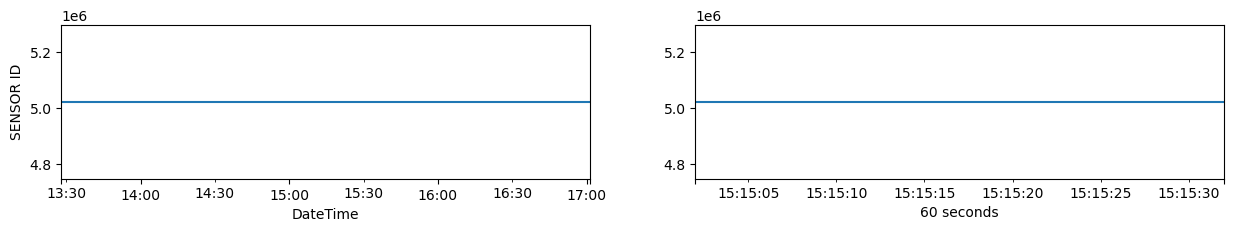

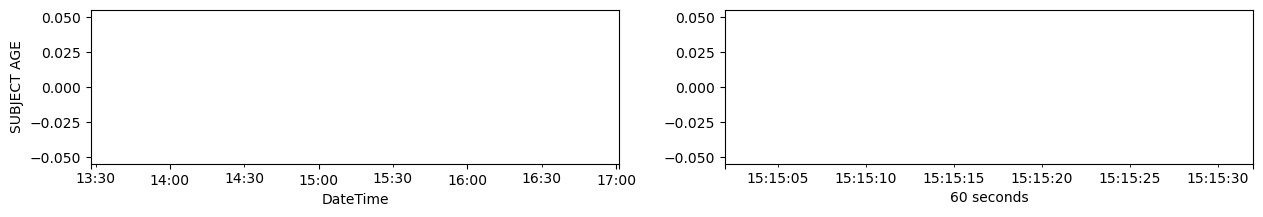

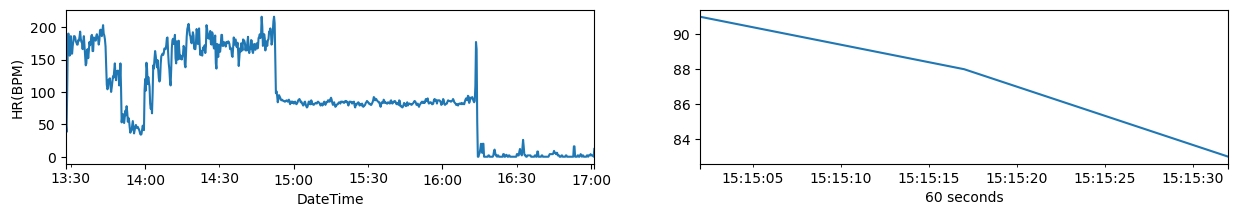

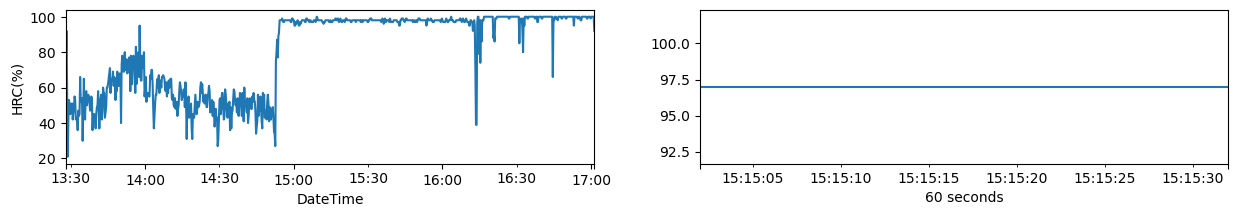

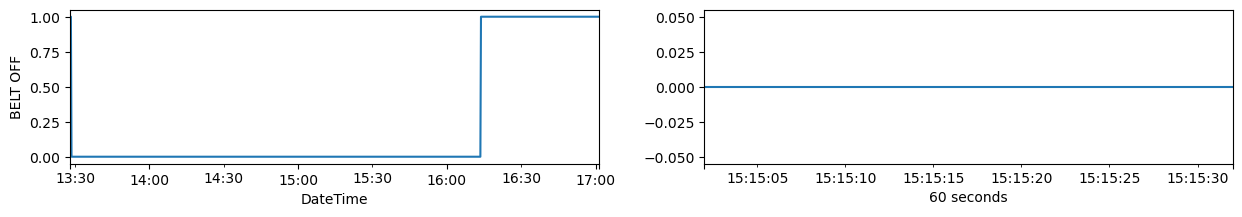

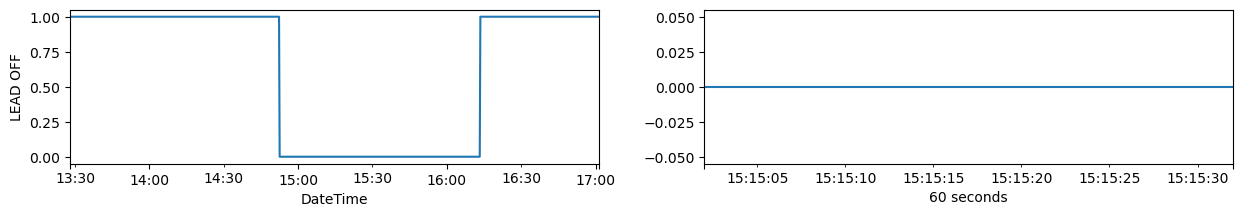

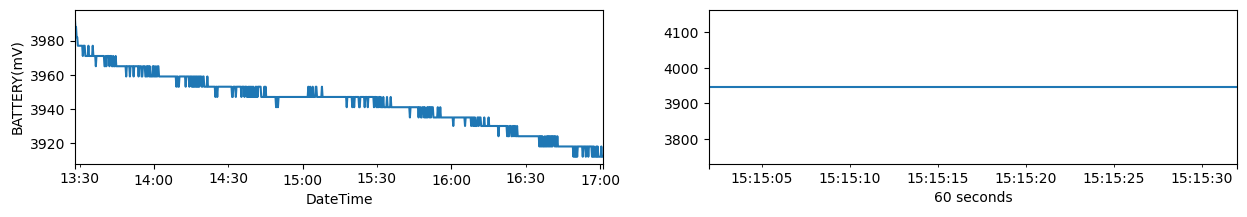

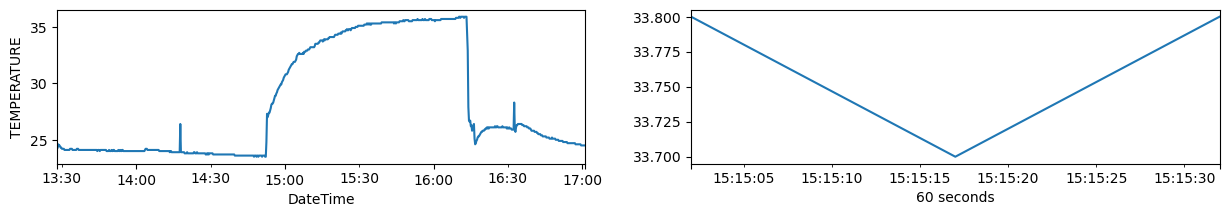

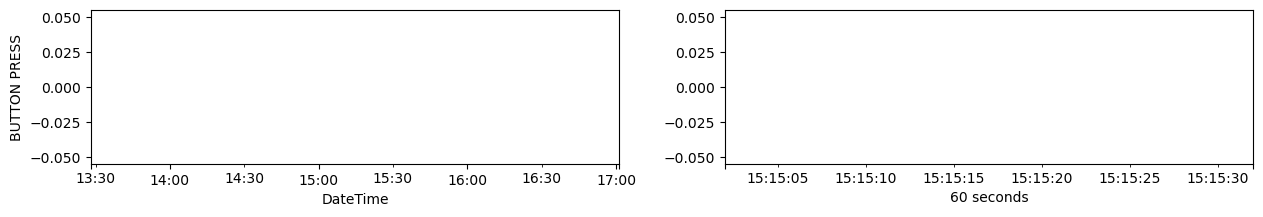

,DateTime,SENSOR ID,SUBJECT ID,SUBJECT AGE,HR(BPM),HRC(%),BELT OFF,LEAD OFF,MOTION,BODY POSITION,BATTERY(mV),TEMPERATURE,BUTTON PRESS
0,2023-02-18 13:28:02+00:00,5022077,VN209,NaN,50,73,1,1,Stationary,Side,3994,24.2,NaN
1,2023-02-18 13:28:17+00:00,5022077,VN209,NaN,38,92,1,1,MovingSlowly,Unknown,3988,24.3,NaN
2,2023-02-18 13:28:32+00:00,5022077,VN209,NaN,96,59,0,1,Stationary,Prone,3988,24.6,NaN
3,2023-02-18 13:28:47+00:00,5022077,VN209,NaN,168,21,0,1,Stationary,Prone,3982,24.5,NaN
4,2023-02-18 13:29:02+00:00,5022077,VN209,NaN,190,42,0,1,Stationary,Prone,3982,24.5,NaN


In [11]:
# Plot a quick view of the DATA file numeric fields
V = pd.read_csv(eq_file_loc,skipinitialspace=True)
qex.test_plot_signals(V)
V.iloc[:5]

Now grab all the files from that recording and presente a test plot of each, full and middle minute


In [24]:
pwd

'C:\\Users\\fourMs lab\\Documents\\Equivital_data_reviewing-main'

Index(['DateTime', 'SENSOR ID', 'SUBJECT ID', 'SUBJECT AGE', 'HR(BPM)',
       'HRC(%)', 'BELT OFF', 'LEAD OFF', 'MOTION', 'BODY POSITION',
       'BATTERY(mV)', 'TEMPERATURE', 'BUTTON PRESS'],
      dtype='object')
SENSOR ID


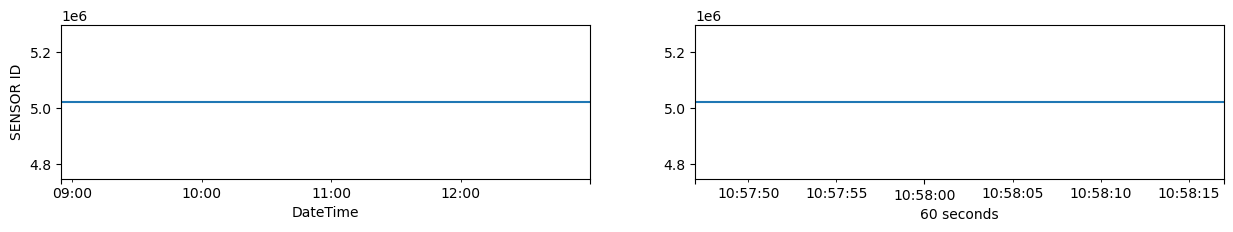

0.12314796447753906
Index(['DateTime', 'Lead 1', 'Lead 2'], dtype='object')
Lead 1


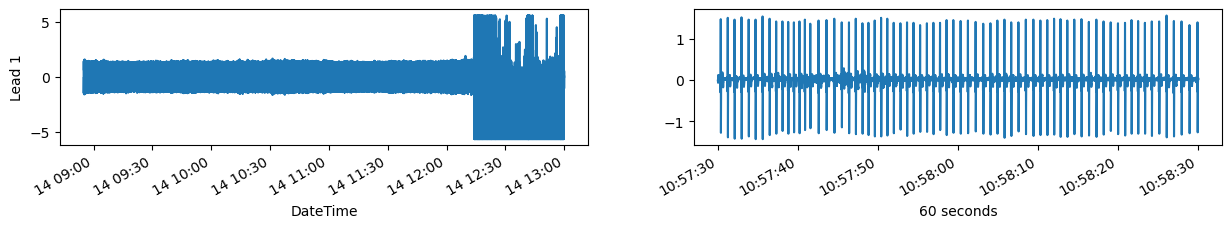

39.207972049713135
Index(['DateTime', 'Vert Accelerometer', 'Lat Accelerometer',
       'Long Accelerometer'],
      dtype='object')
Vert Accelerometer


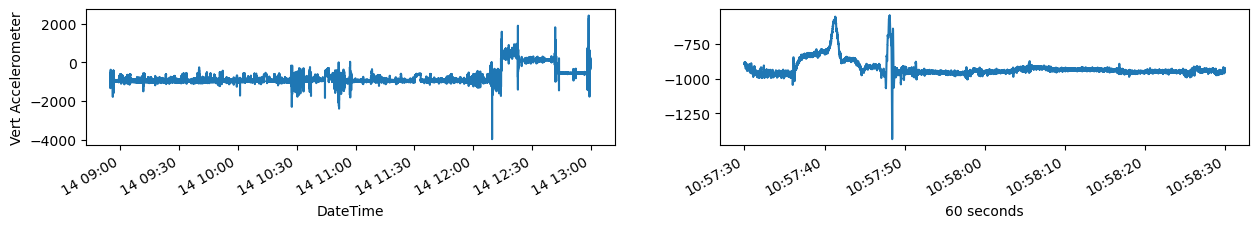

78.05759382247925
Index(['DateTime', 'Breathing'], dtype='object')
Breathing


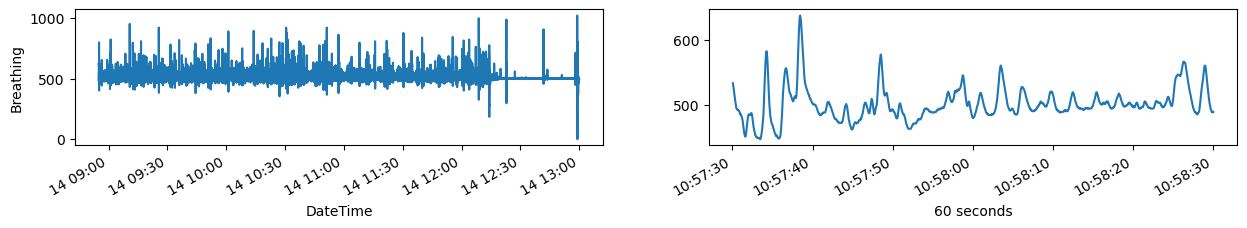

82.53541159629822
Index(['DateTime', 'Interbeat Interval (MS)'], dtype='object')
Interbeat Interval (MS)


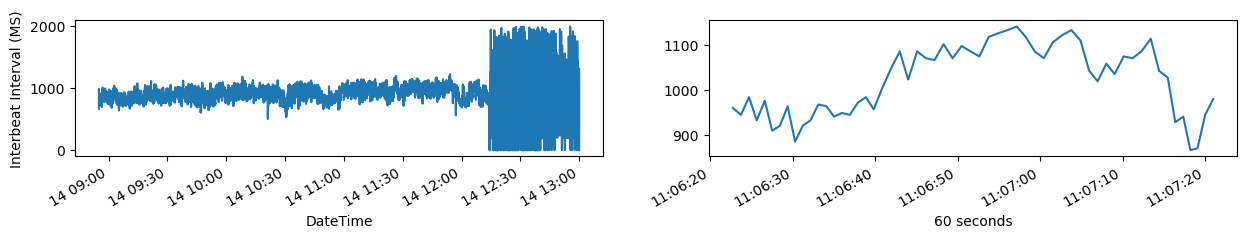

82.9503378868103


In [25]:
tic = time.time()

matched = qex.matched_files(eq_file_loc,path,seperator) # outputs locations of csv 
for eq_file_loc in matched:
    if eq_file_loc.lower().endswith('.csv'):
        V = pd.read_csv(eq_file_loc,skipinitialspace=True)
        print(V.columns)
        qex.test_plot_signal(V)

        print(time.time()-tic)

Index(['DateTime', 'SENSOR ID', 'SUBJECT ID', 'SUBJECT AGE', 'HR(BPM)',
       'HRC(%)', 'BELT OFF', 'LEAD OFF', 'MOTION', 'BODY POSITION',
       'BATTERY(mV)', 'TEMPERATURE', 'BUTTON PRESS'],
      dtype='object')


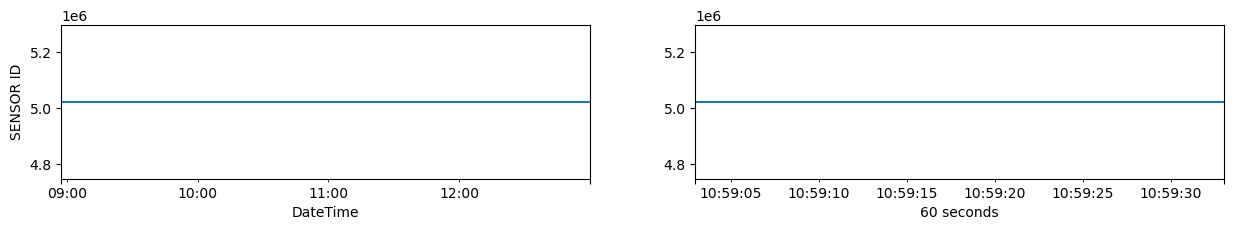

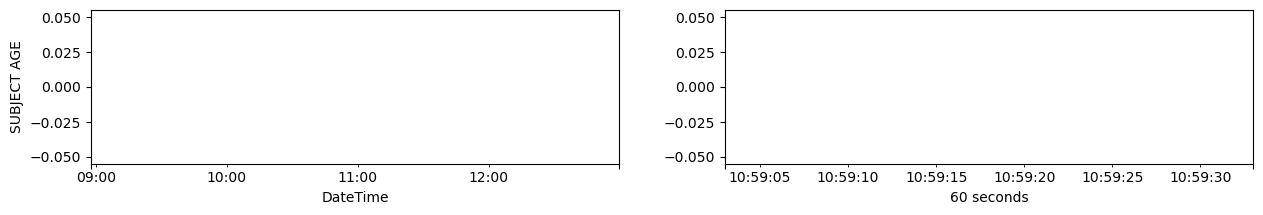

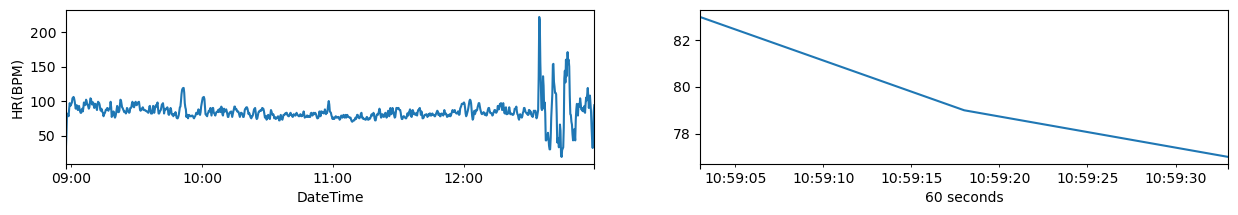

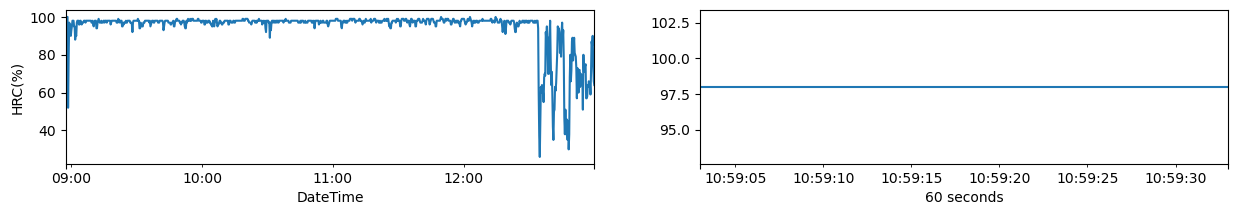

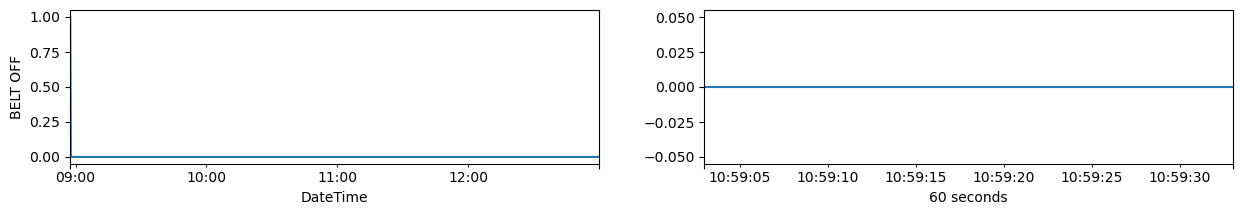

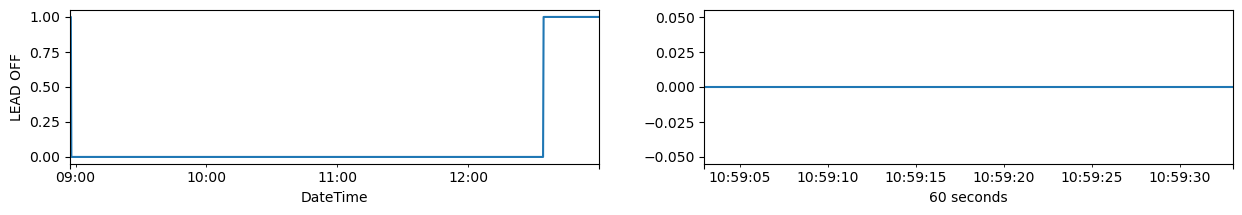

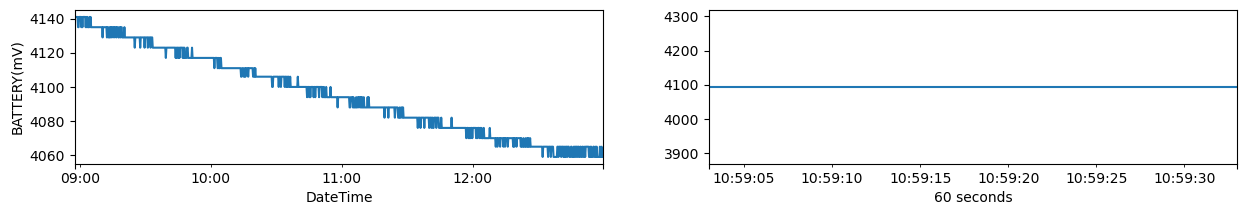

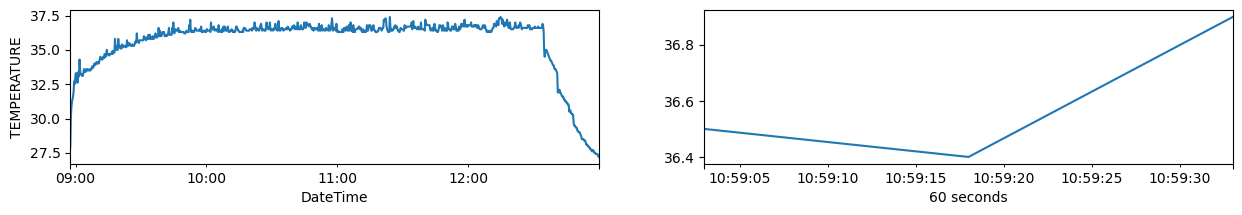

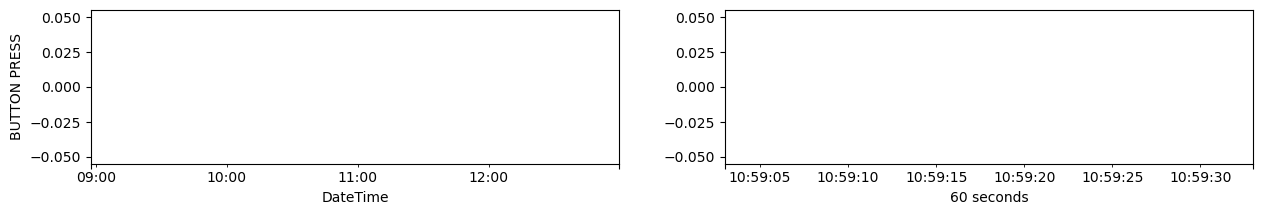

1.0964093208312988
Index(['DateTime', 'Lead 1', 'Lead 2'], dtype='object')


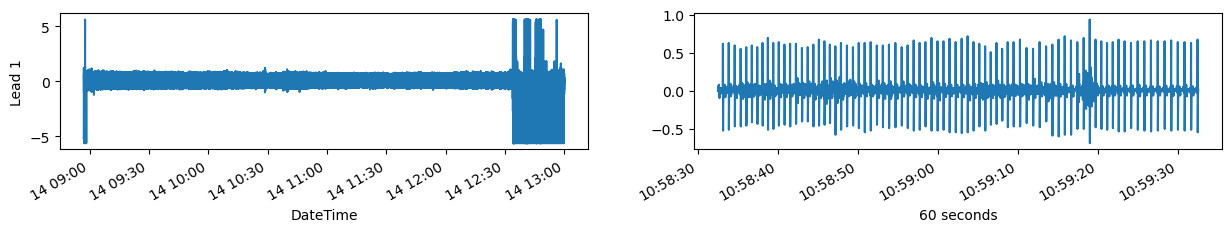

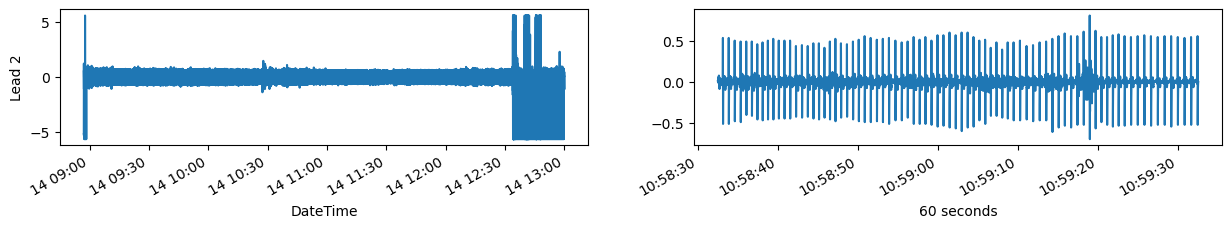

72.47602796554565
Index(['DateTime', 'Vert Accelerometer', 'Lat Accelerometer',
       'Long Accelerometer'],
      dtype='object')


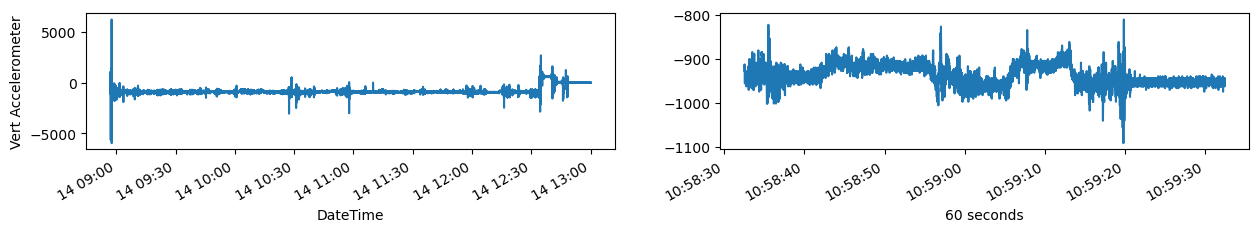

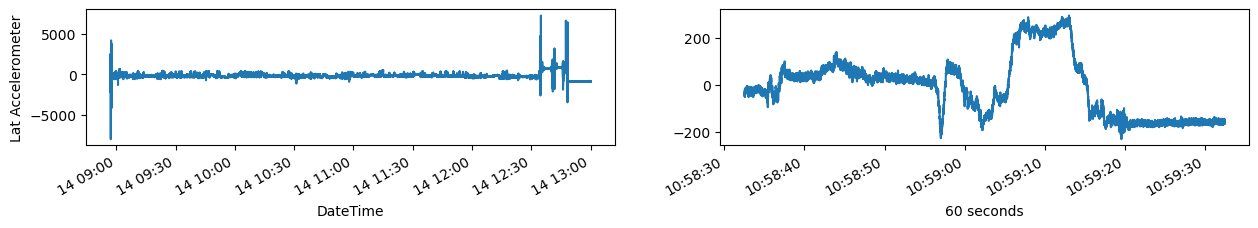

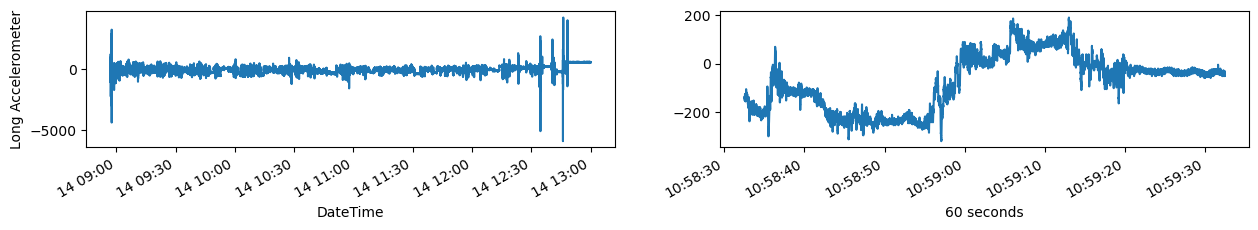

172.87929677963257
Index(['DateTime', 'Breathing'], dtype='object')


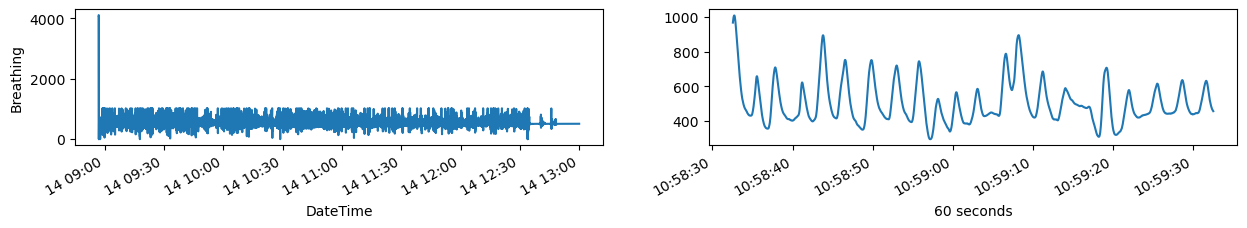

176.72257161140442
Index(['DateTime', 'Interbeat Interval (MS)'], dtype='object')


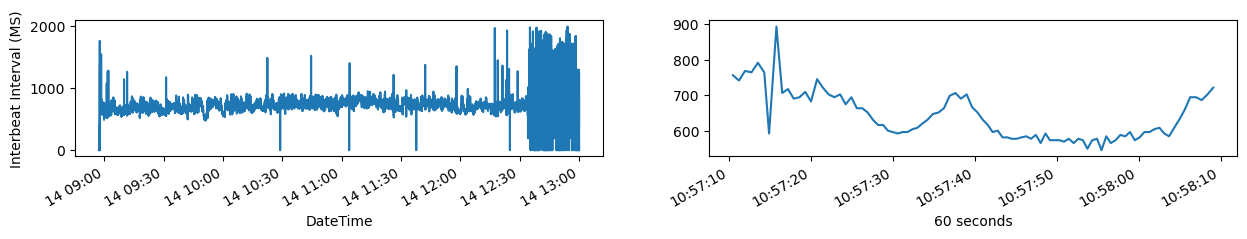

177.1832571029663


FileNotFoundError: [Errno 2] No such file or directory: ''

In [12]:
tic = time.time()

matched = qex.matched_files(eq_file_loc,path,seperator) # outputs locations of csv 
for eq_file_loc in matched:
    if eq_file_loc.lower().endswith('.csv'):
        V = pd.read_csv(eq_file_loc,skipinitialspace=True)
        print(V.columns)
        qex.test_plot_signals(V)

        print(time.time()-tic)

In [ ]:
eq_file_loc

# Plot all signals recorded at specific time

In [9]:
# the times at which you want to check the recording
# note: make sure you set the times to within the recording interval for that file!!
t1 = pd.to_datetime('2023-02-18 15:55:00.00+0100')# V['DateTime'].iloc[int(len(V)/2)]
t2 = pd.to_datetime('2023-02-18 17:13:00.00+0100')
#t2 = t1+pd.to_timedelta(240,'s')
[t1,t2]

[Timestamp('2023-02-18 15:55:00+0100', tz='pytz.FixedOffset(60)'),
 Timestamp('2023-02-18 17:13:00+0100', tz='pytz.FixedOffset(60)')]

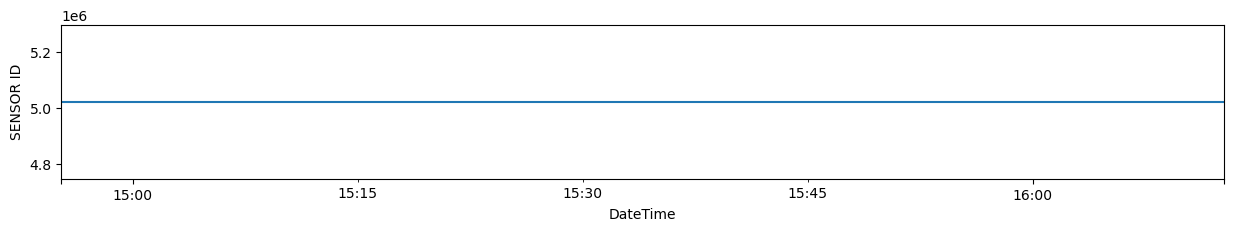

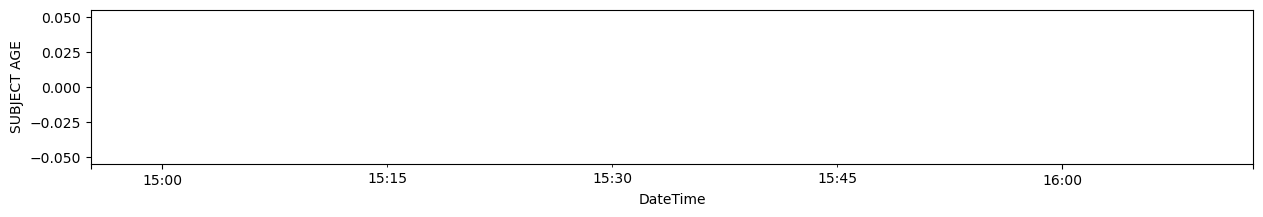

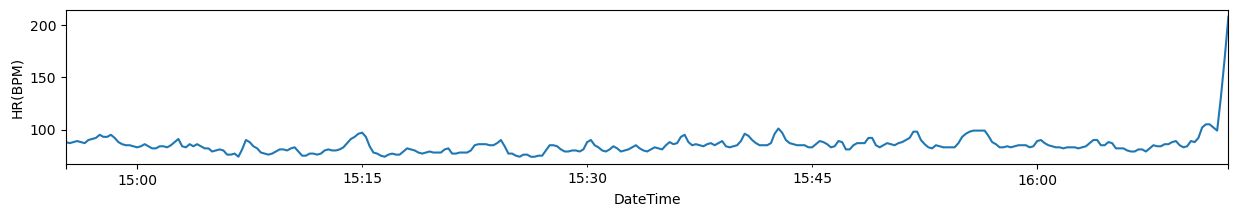

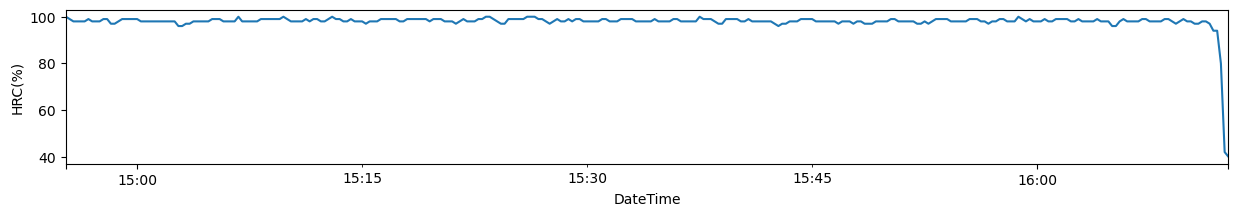

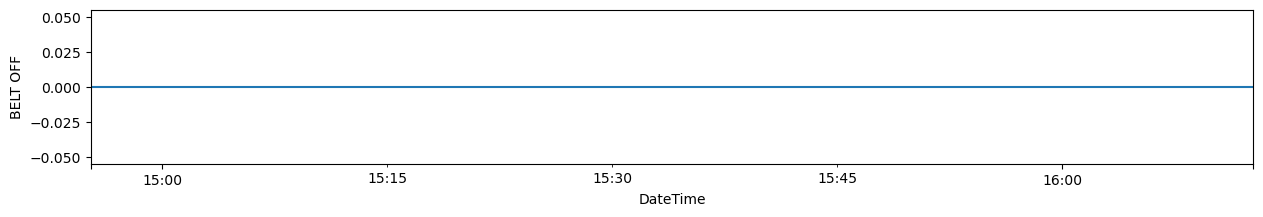

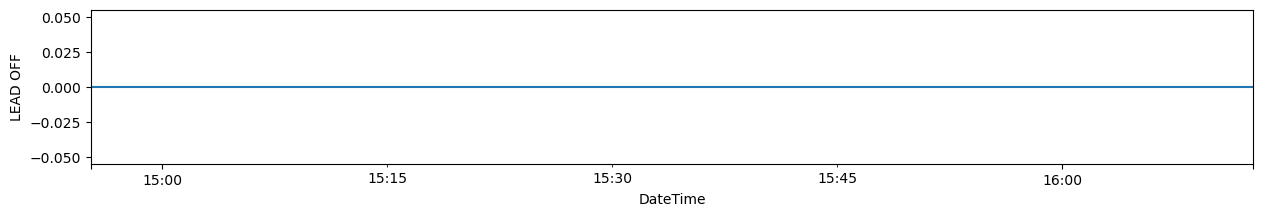

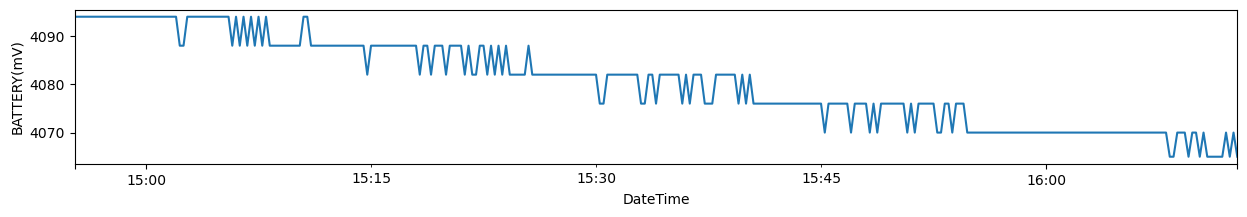

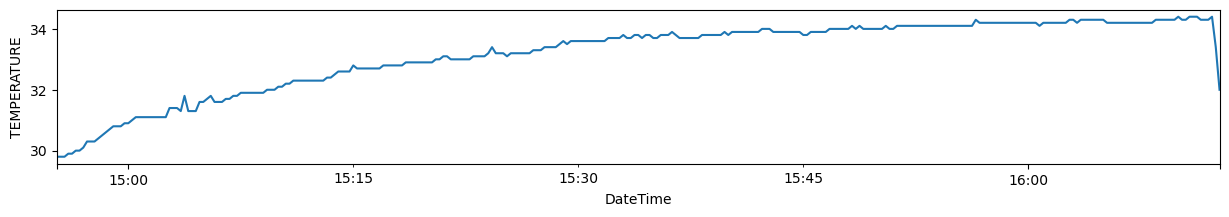

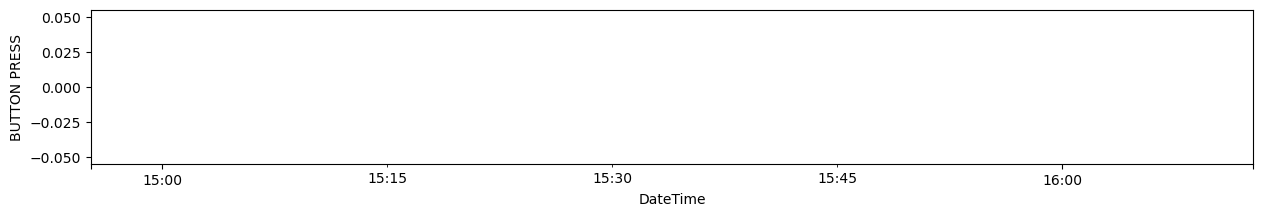

1.2157647609710693


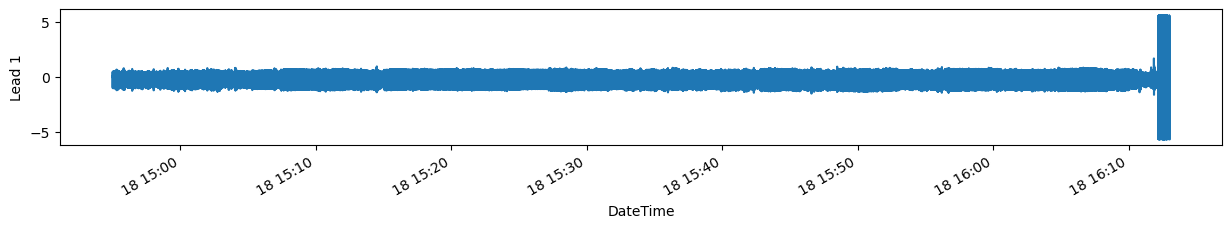

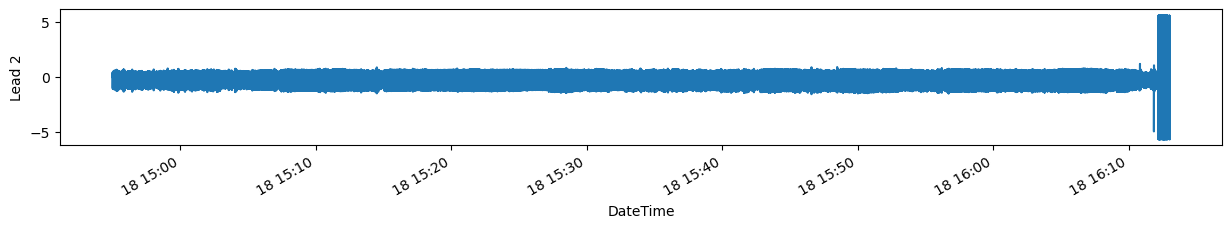

42.87659025192261


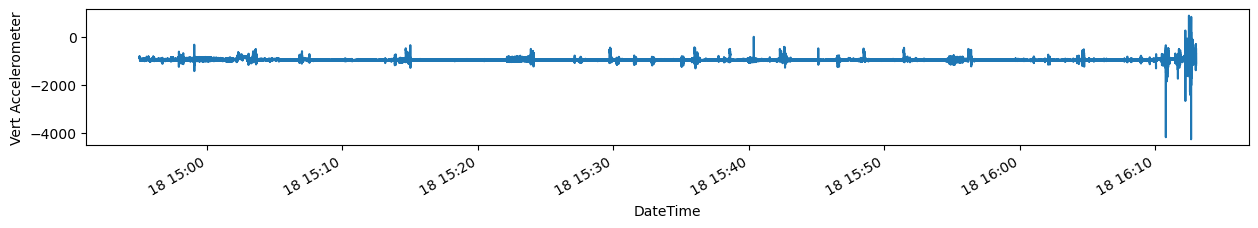

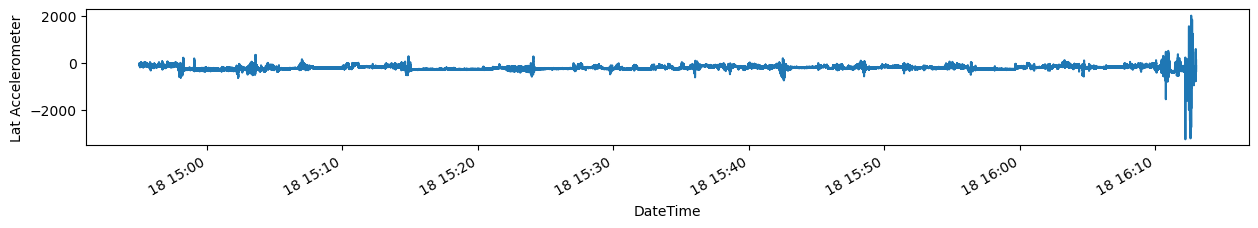

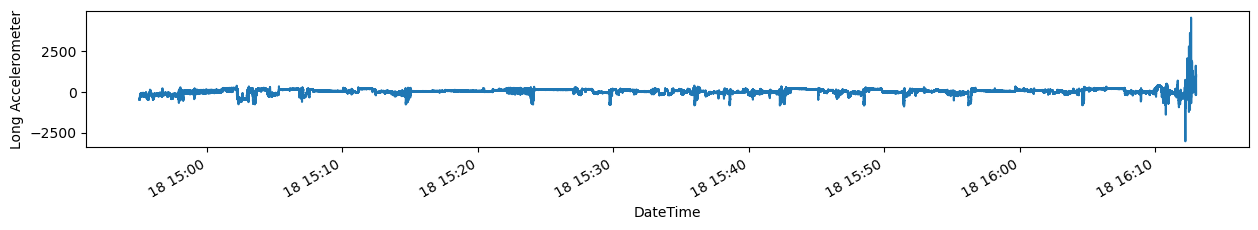

96.71552538871765


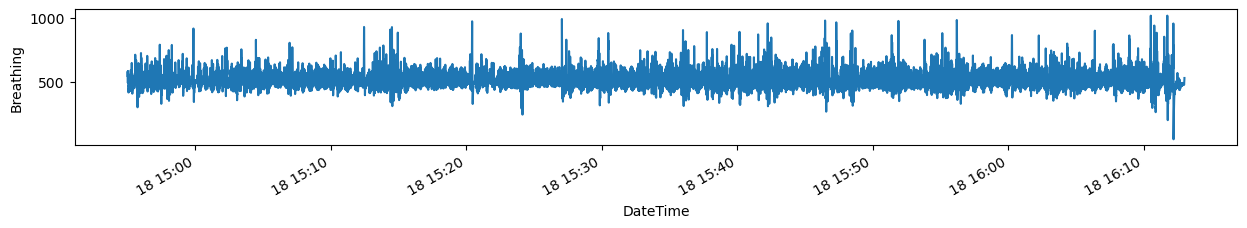

99.17161893844604


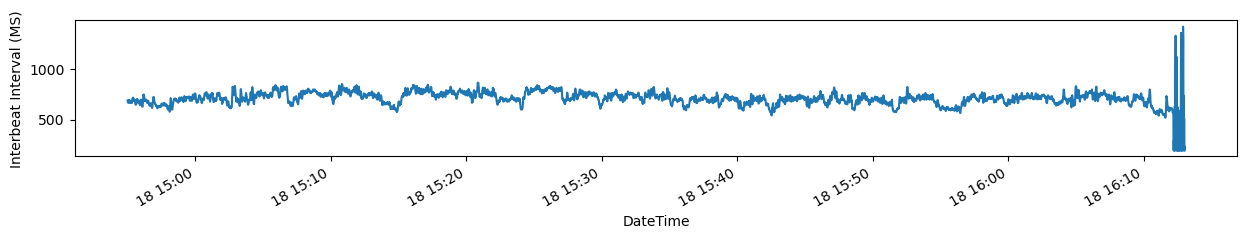

99.46699380874634


ParserError: Error tokenizing data. C error: EOF inside string starting at row 0

In [12]:
tic = time.time()

for eq_file_loc in matched:
    V = pd.read_csv(eq_file_loc,skipinitialspace=True)
#     print(V.iloc[:2,:])
    qex.test_plot_signals_interval(V,t1,t2)
    print(time.time()-tic)

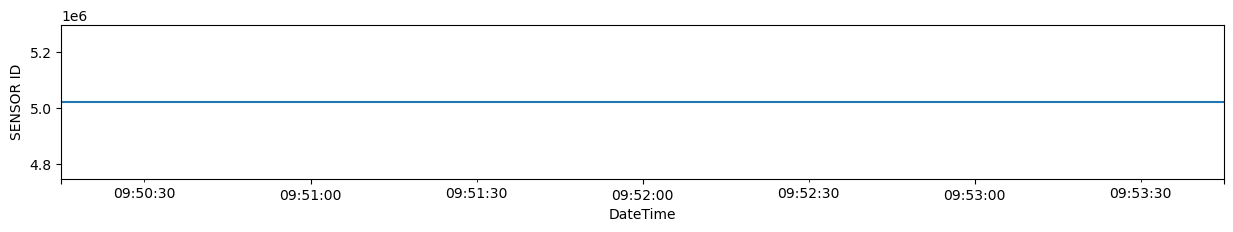

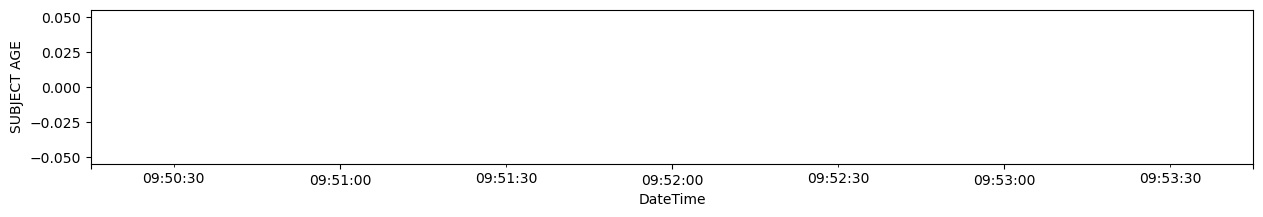

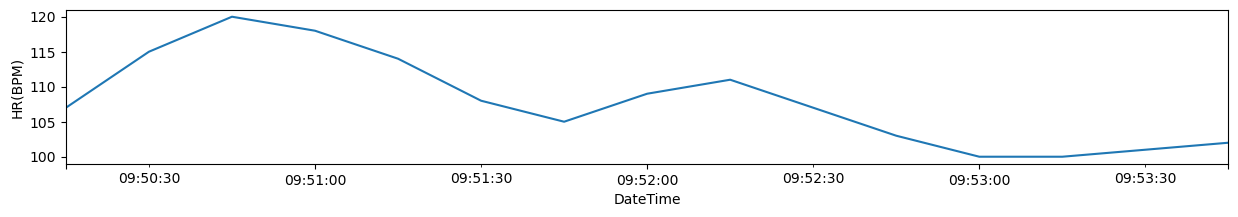

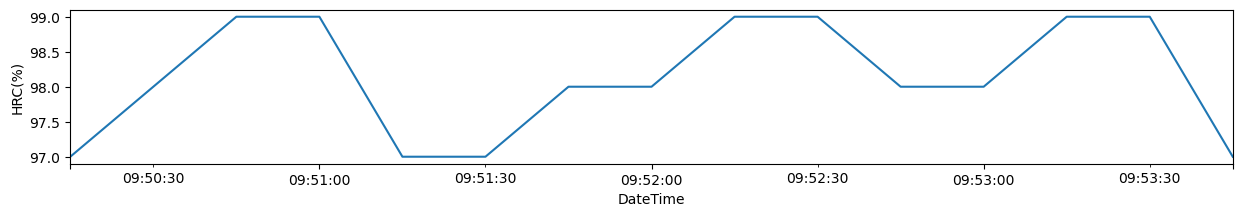

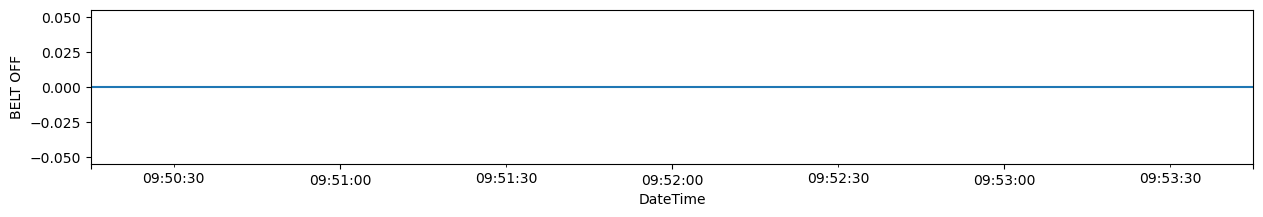

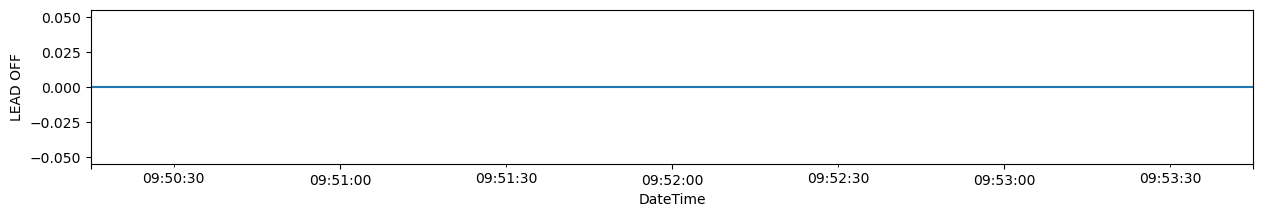

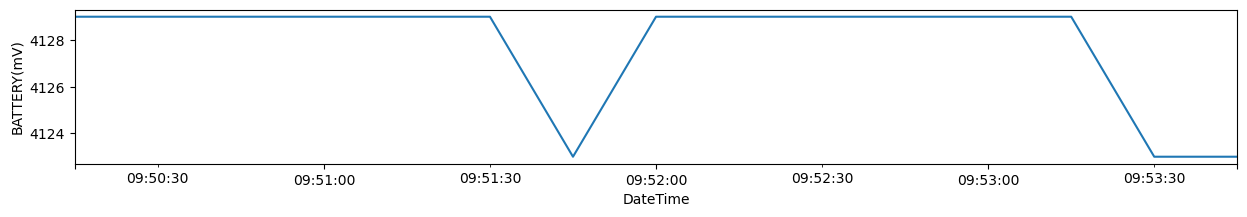

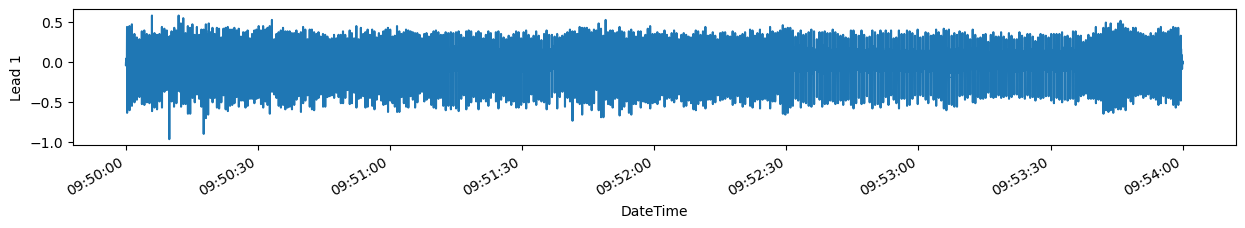

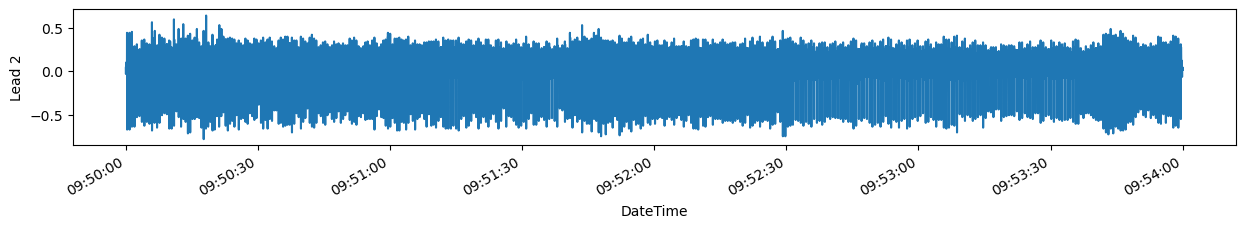

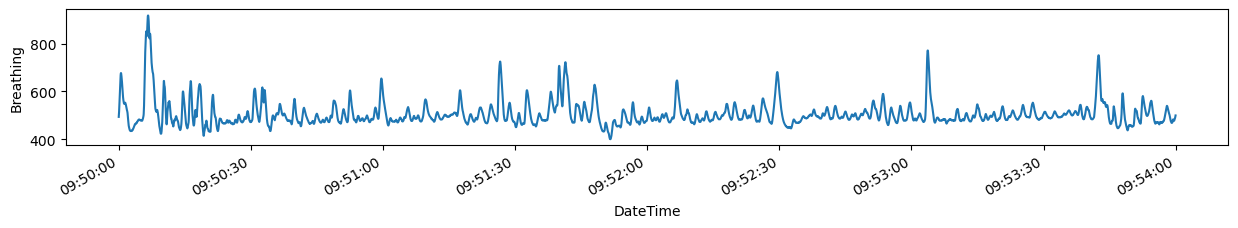

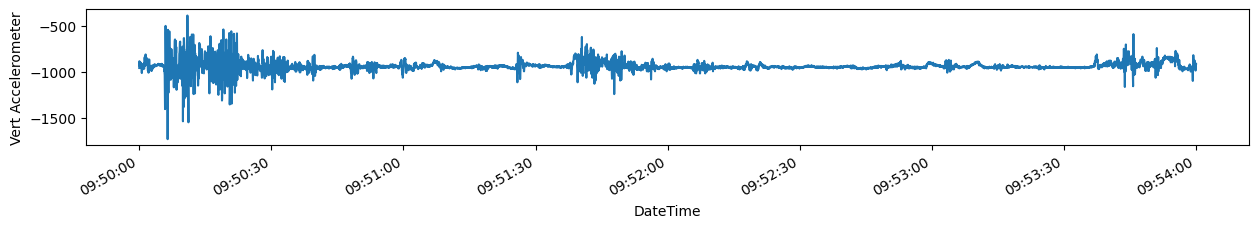

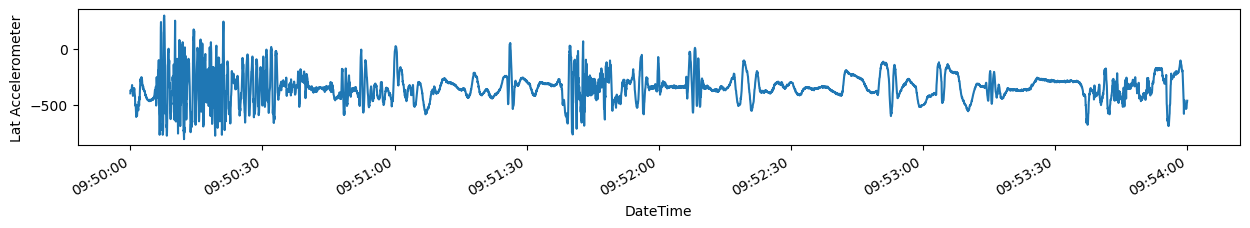

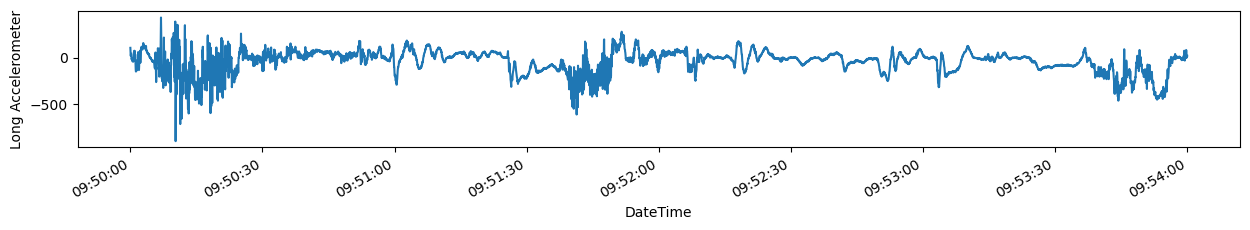

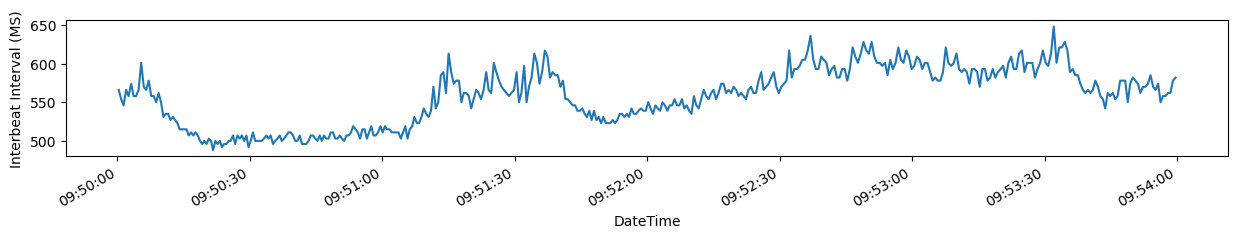

No data


In [104]:
# to save exported plots
plotname = 'ViolinPlayingPilot'
for eq_file_loc in matched:
    V = pd.read_csv(eq_file_loc,skipinitialspace=True)
#     print(V.iloc[:2,:])
    qex.test_plot_signals_interval_save(V,t1,t2,plotname)

In [45]:
eq_file_loc

'C:\\Users\\fourMs lab\\Documents\\Equivital\\ProjectData\\SoloRecordings\\SEM\\Pilot_1\\23020100_1.SEM'